## Basta Safe Driver, Sweet Lover

a.k.a this is how http://datamom.tech spends her free time. =D 

## Exploring the Data

### Preparing the Dataset for Exploration

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sklearn,statsmodels

In [4]:
import pandas as pd
import glob,os

#Load the original Safety data CSV files from Grab
path=r'../safety/features'
all_files = glob.glob(os.path.join(path, "*.csv"))
rawdata = pd.concat((pd.read_csv(f) for f in all_files),ignore_index=True)
print(rawdata.describe())

          bookingID      Accuracy       Bearing  acceleration_x  \
count  1.613556e+07  1.613556e+07  1.613556e+07    1.613556e+07   
mean   8.184819e+11  1.161035e+01  1.689684e+02    6.914529e-02   
std    4.952476e+11  8.691672e+01  1.072966e+02    1.424161e+00   
min    0.000000e+00  7.500000e-01  0.000000e+00   -7.841969e+01   
25%    3.779571e+11  3.900000e+00  7.800000e+01   -5.081238e-01   
50%    8.074539e+11  4.250000e+00  1.688700e+02    6.137085e-02   
75%    1.254130e+12  8.000000e+00  2.629840e+02    6.350620e-01   
max    1.709397e+12  6.070101e+03  3.599995e+02    6.687346e+01   

       acceleration_y  acceleration_z        gyro_x        gyro_y  \
count    1.613556e+07    1.613556e+07  1.613556e+07  1.613556e+07   
mean     4.468976e+00    8.942974e-01 -1.710847e-03  2.800733e-04   
std      8.130664e+00    3.251549e+00  1.445619e-01  3.400630e-01   
min     -7.299412e+01   -7.844842e+01 -4.845575e+01 -7.488861e+01   
25%     -2.022476e+00   -9.316101e-01 -2.678888e-02

In [5]:
rawdata.shape

(16135561, 11)

In [6]:
# Conserve raw data in case anything goes wrong later.
training = rawdata.copy()
# Begin working with training dataset from here on. 
training.sort_values('bookingID',ascending=False).head(500)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
15087505,1709396983975,8.000,286.980865,-0.857889,-9.487320,-3.485986,0.007109,-0.026745,0.056592,488.0,6.235768
10814069,1709396983975,16.000,47.957001,-0.699979,-8.232263,-3.755301,-0.042318,0.020859,0.044240,118.0,1.660248
15939517,1709396983975,65.000,97.686295,0.122919,-8.605206,-4.983142,-0.013877,-0.003309,0.003017,22.0,-1.000000
15545597,1709396983975,32.000,42.757172,-1.321301,-9.065927,-3.128146,0.008450,-0.133974,-0.067112,60.0,2.876334
6088020,1709396983975,48.000,21.060766,-0.522479,-9.518573,-2.594751,-0.039018,-0.021531,-0.023971,448.0,-1.000000
438715,1709396983975,8.000,16.966106,-0.401505,-8.894559,-4.126151,0.066340,-0.026159,0.008314,445.0,7.865611
8563562,1709396983975,4.000,355.035675,1.345377,-8.706592,-4.406232,0.022089,0.386384,0.172093,469.0,4.891044
15006229,1709396983975,32.000,164.694427,0.314026,-8.626590,-4.406680,-0.021231,0.050856,0.041326,75.0,6.162135
8563708,1709396983975,6.000,24.368900,-0.126657,-9.012244,-3.872388,-0.016133,0.011595,0.000861,427.0,2.954595
6611181,1709396983975,8.000,255.311905,0.935349,-9.262567,-3.129193,0.043100,0.347217,0.140364,541.0,2.340552


In [7]:
# Observe what a single booking ID record looks like
singletrip = training[training.bookingID==1709396983971]
singletrip.sort_values('second')
singletrip.shape
singletrip.sort_values('second').tail(15)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
3812801,1709396983971,5.309,116.0,0.442941,8.351231,4.460534,-0.055088,-0.241041,-0.108206,1065.0,1.161345
6123338,1709396983971,5.355,139.0,0.304073,8.602630,4.513208,-0.032486,-0.266698,-0.121645,1066.0,1.601730
505878,1709396983971,5.288,155.0,0.359141,8.375174,4.017593,0.127561,-0.236765,0.024962,1067.0,1.011407
6907890,1709396983971,5.219,167.0,0.179571,8.257853,3.632115,-0.089907,-0.151855,-0.055672,1068.0,0.802165
3535201,1709396983971,5.132,180.0,0.536318,8.918674,4.352792,0.081135,-0.015632,-0.059948,1069.0,0.000000
14572709,1709396983971,5.071,180.0,0.694340,8.329682,4.197164,-0.113731,-0.190339,-0.004359,1070.0,0.000000
3776233,1709396983971,4.559,199.0,0.766168,9.189227,4.419831,0.075637,-0.139638,-0.014133,1071.0,0.494635
352613,1709396983971,4.506,215.0,0.581809,8.861211,5.262616,-0.015382,-0.197059,-0.157686,1072.0,1.999451
4215885,1709396983971,4.414,228.0,0.136474,8.616995,4.917840,0.007831,-0.214774,-0.127754,1073.0,1.737789
5405645,1709396983971,4.465,241.0,0.160416,8.274613,4.563488,-0.061807,-0.128642,-0.091102,1074.0,2.164736


In [8]:
singletrip.dtypes

bookingID           int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
dtype: object

In [9]:
singletrip.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
count,1.077000e+03,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,1.709397e+12,5.401185,204.802228,0.669512,8.896987,3.759712,0.003282,-0.000685,-0.000242,540.761374,6.245733
std,0.000000e+00,5.675749,107.132231,1.054684,0.625198,0.824513,0.065412,0.170280,0.066798,311.426642,5.652057
min,1.709397e+12,3.000000,0.000000,-3.550709,5.542746,0.993624,-0.696496,-1.048605,-0.521151,0.000000,-1.000000
25%,1.709397e+12,3.900000,104.000000,-0.294496,8.626573,3.366350,-0.012327,-0.020519,-0.011079,272.000000,0.000000
50%,1.709397e+12,4.000000,243.000000,0.861939,8.856422,3.754223,0.002334,0.002694,-0.003137,541.000000,5.789215
75%,1.709397e+12,6.000000,290.000000,1.503605,9.160496,4.175615,0.015773,0.017355,0.009080,810.000000,11.285072
max,1.709397e+12,48.000000,359.000000,4.637710,12.165310,9.347249,0.652905,3.940942,0.929654,1079.000000,19.287226


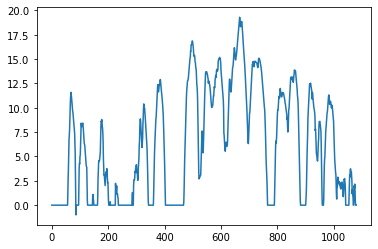

In [14]:
#Speed
x=singletrip.sort_values('second')['second']
y=singletrip.sort_values('second')['Speed']
plt.plot(x,y)
plt.show()

# The sharp changes in speed are the ones to watch out for. 
# However, these values need to be weighted with respect to the measured accuracy of that observation. [Accuracy column]

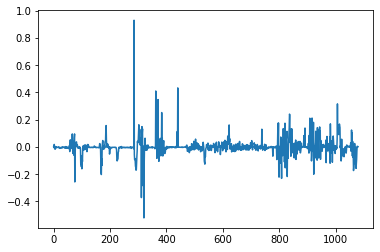

In [11]:
#Z Gyroscope Reading for Tilt Behavior
x_gyro=singletrip.sort_values('second')['second']
y_gyro=singletrip.sort_values('second')['gyro_z']
plt.plot(x_gyro,y_gyro)
plt.show()

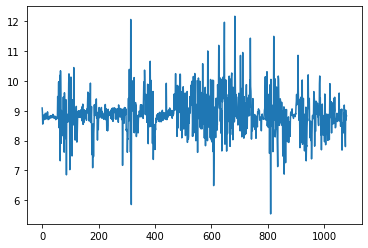

In [12]:
# Y (Lateral) acceleration for Speed Control
x_yaccel=singletrip.sort_values('second')['second']
y_yaccel=singletrip.sort_values('second')['acceleration_y']
plt.plot(x_yaccel,y_yaccel)

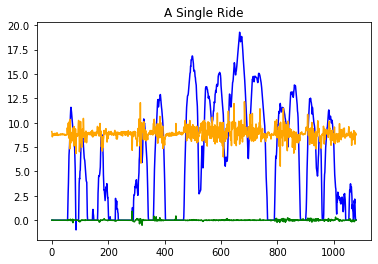

In [13]:
plt.plot(x,y,color='blue')
plt.plot(x_gyro,y_gyro,color='green')
plt.plot(x_yaccel,y_yaccel,color='orange')
plt.title('A Single Ride')
plt.show()

## Process

1. Tie records by booking ID to map out start and stop journey. (RDS)
2. Prioritize longer observations. 
3. Coordinate Calibration and Other Data Pre-processing 
4. Give weight to accuracy inferred.
5. Full feature selection
6. Data Model and Training 
7. Anomaly Detection 

## Useful Lits to Keep Me Woke AF

### Automotive Telematics - Road Safety vs IT Security? by Ralf Herrtwich

* "A more recent development is to see a role for telematics not just in the aftermath of a crash, but in the stages before it. Vehicles getting involved in or exposed to hazardous situations (e.g., detecting some black ice on the road) may communicate the potential danger to approaching vehicles upstream and, thereby, prepare drivers to be alert."

### A Study on Road Accidents in Abu Dhabi -  Implementing a Vehicle Telematics System to Reduce Cost, Risk and Improve Safety by Omar Kassem Kahlil 

* Attention to sudden brakes in between start and stop points logged on driver journey
* Some mention on regulatory policies aligning with data on ground using the recommended enterprise system. In a corporate setting, that means regulatory policies for fleet drivers. 

### Predictive Modeling Using Telematics by Robert Bear, Joseph Marker, Kailan Shang and Hai You

* X Y location mapping telematics -- may be useful to this case if external data were merged with existing data

### SafeDrive: Online Driving Anomaly Detection from Large-Scale Vehicle Data by Zhang et al

* Rule-based techniques to extract abnormal driving behavior
* Driving anomalies:  aggressive acceleration, sudden breaking, fast turn, overspeed, rapid swerving, and even mismatching of RPM with speed.
* Offline Model Creation and Online Live Anomaly Detection, really solid comparison of rule-based techniques in the related lit section
* Onboard Diagnostic Data included (OBD)
* Data used was speed, RPM, swerving expressed in terms of degrees, gear positions
* Recent research uses Hidden Markov Model (HMM) and SVM to detect driving anomalies

### Semiautonomous Vehicle Risk Analysis: A Telematics-Based Anomaly Detection Approach by Cian Ryan, Finbarr Murphy,∗ and Martin Mullins

* (1) acceleration Z axis (longitudinal), (2) acceleration Y axis (lateral),
(3) acceleration X axis (vertical) and velocity
* MVG-based anomaly detection approach was adopted 

### Feature Selection for Anomaly Detection in Vehicular Ad Hoc Networks by Van Huynh Le, Jerry den Hartog and Nicola Zannone

* Rear end
* Opposite direction
* Lane change
* Scenarios:
** Rear-end Pre-crash Scenario. The leading vehicle (V2) can make the vehicle behind (V1) brake by creating the false impression of a rear-end pre-crash scenario (Figure 2(a)). To this end, V2 can report loca- tion closer to V1, lower speed, negative longitudinal acceleration, or their combination.
** Lane Change Scenario. A vehicle (V2) can make another vehicle (V1) abort changing lane by causing the misconception that V2 is in a colliding course with V1 (Figure 2(b)). To this end, V2 can report false location, higher speed, and higher acceleration. Alter- natively, V1 could make V2 brake by reporting that it is changing lane while actually going straight forward.
** Opposite Direction Scenario. A vehicle (V2) can persuade another vehicle (V1) to take evasive maneuver (e.g., turning right) by reporting false loca- tion (Figure 2(c)).

### Combining speed and acceleration to detect reckless driving in the informal public transport industry by AS Zeeman

* Driving patterns classification using Hidden Markov Mod- els (HMM) is proposed by [10] as a framework for machine learning for modelling and recognizing driver behaviour.
* Fuzzy logic used traditionally is "erratic" 
* Filter raw acceleration data using EMA -- chosen as low pass filter 
* As expected, taxis travel at higher speeds on highways than in urban areas. Taxis travelled at over 140km/h, which is 40km/h over the legal speed limit.
* Variations in longitudinal acceleration is more frequent in urban areas, since taxis regularly stop to pick up passengers. Long-distance taxis are loaded early on a long distance journey and they don’t stop often.
* Lateral acceleration variations are more frequent in urban areas, since the radius of curves on highways is larger than in urban areas. Taxis also frequently pull over to the side of the road to pick up passengers in urban areas.
* At a high speed, the same g-force feels more dangerous than at a lower speed. This is confirmed from road design principles where maximum lateral acceleration thresholds are reduced with an increase in speed.
* Highway events include: circular curve following, swerving and sharp braking.
* Useful equations here <3 

### DrivingSense: Dangerous Driving Behavior Identification Based on Smartphone Autocalibration by Mai et al.

* Accelerometer, Gyroscope, GPS, Mic
* Coordinate reorientation, sensor error determination, data correction
* Speeding, illegal driving direction change, abnormal speed control
* Coordinate system correction was done to the raw data from smartphone
* Speeding -- Y acceleration and GPS readings
* Irregular Driving Direction Change -- Z gyroscope reading for mapping out spin movement 
* Abnormal Speed Control -- y-accel max and y-accel min matched against a threshold for a driver
* Microphone is effective in detecting honking of horns and matched with sudden movements in the vehicle



### Exploiting the Use of Recurrent Neural Networks for Driver Behavior Profiling by Carvalho et al

* Recurrent Neural Networks -- difficult to train
* Sensor data  translated to earth coordinate system in this case
* Braking, Accel, Left Turn, Right Turn, Lane Change, Non-aggressive
* Keras and 3 topology models

### Mobile Phone Based Drunk Driving Detection by Dai et al

* Weaving, drifting, swerving, turning with a wide radius


### Other Useful Sources

* https://www.sentiance.com/2016/02/11/driving-behavior/
* http://www.starlino.com/imu_guide.html